this data for site udemy.com , this is most popular website for online courses 
we will get more benifits from this data for example 

- what is most popular couses ?
- what is top rating courses ?
- what is kind populate students ?
- what is heigh courses price ?
- what is low courses price ?

and more information used by data science .

- for download this data you can visit the source from kaggle.com 

- https://www.kaggle.com/andrewmvd/udemy-courses

for work at this project we will used the ( CRISP - DM ) Rules in data science .
(Cross-industry standard process for data mining)

# The CRISP - DM including this steps .

- I. Business Understanding
- II. Data Understanding
- III. Data Preparation
- IV. Modeling
- V. Evaluation
- VI. Deployment



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly 
#import folium
#import plotly_express
from sklearn.model_selection import cross_val_score
#import plotly.express as px
#import plotly.graph_objs as go
#import plotly.offlinea as py
#from plotly.offline import iplot
#from plotly.subplots import make_subplots
#import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression 
url1='https://raw.githubusercontent.com/apomohab/Capstone_project_Data_Science/main/udemy_courses.csv'
df = pd.read_csv(url1)
import sys
#sys.setrecursionlimit(10000)


#print head data
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [33]:
# Print The all coumnns in dataframe.

for x in df.columns:
    print(x)

course_id
course_title
url
is_paid
price
num_subscribers
num_reviews
num_lectures
level
content_duration
published_timestamp
subject


In [34]:
#print how many columnns and rows in dataframe .

df.shape

(3678, 12)

In [35]:
# More info for data types and columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [36]:
# Describe data.

df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [37]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [38]:
df['num_lectures'].mean()

40.108754758020666

# EDA 

In [39]:

size = df.size
  
# dataframe.shape
shape = df.shape
  
# dataframe.ndim
df_ndim = df.ndim
  

  
# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))
  


Size = 44136
Shape =(3678, 12)
Shape[0] x Shape[1] = 44136


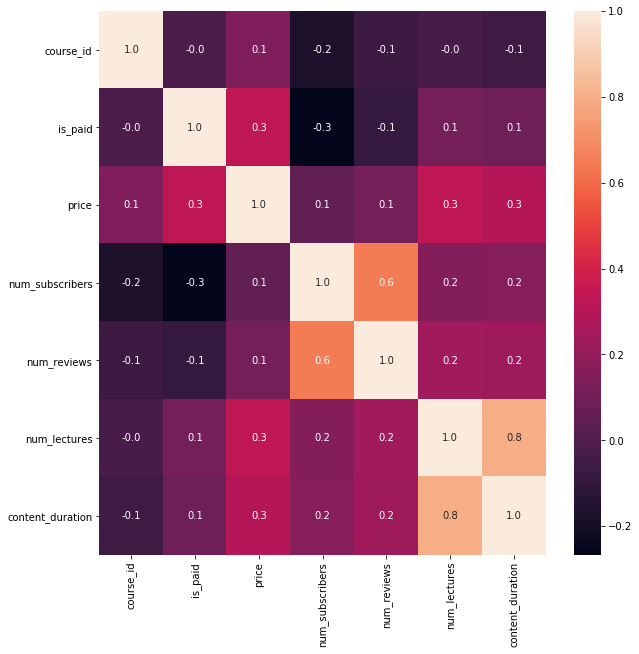

In [40]:


plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True, fmt='.1f')
plt.show()

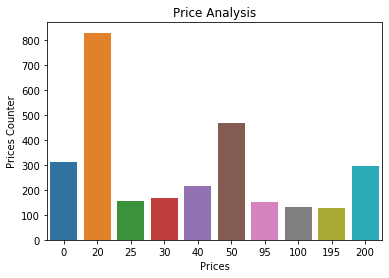

In [41]:
#vis data for age
sns.barplot(x= df.price.value_counts()[:10].index , y=df.price.value_counts()[:10].values)
plt.xlabel('Prices')
plt.ylabel("Prices Counter")
plt.title("Price Analysis")
plt.show()

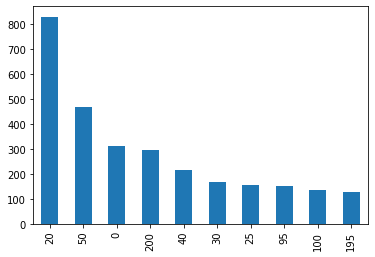

In [42]:
df['price'].value_counts(sort=True).nlargest(10).plot.bar()

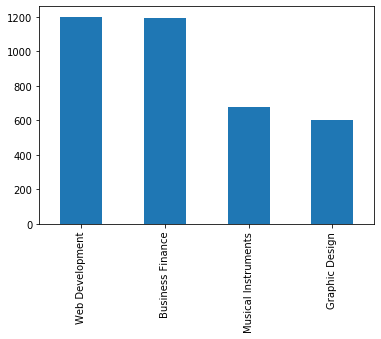

In [43]:
df['subject'].value_counts(sort=True).nlargest(10).plot.bar()

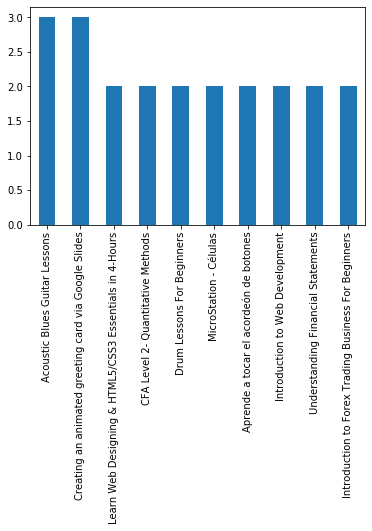

In [44]:
df['course_title'].value_counts(sort=True).nlargest(10).plot.bar()

In [45]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

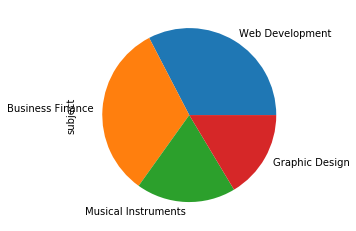

In [46]:
df['subject'].value_counts().plot.pie()

In [47]:
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

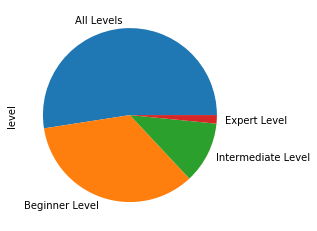

In [48]:
df['level'].value_counts().plot.pie()

In [49]:
df['content_duration'].value_counts()

1.00     607
1.50     507
2.00     419
2.50     269
3.00     248
        ... 
34.00      1
0.00       1
39.00      1
47.00      1
0.45       1
Name: content_duration, Length: 105, dtype: int64

In [50]:
df['num_subscribers'].value_counts()

0        70
1        49
5        28
2        27
4        26
         ..
3380      1
24575     1
16385     1
14254     1
2296      1
Name: num_subscribers, Length: 2197, dtype: int64

In [51]:
show = df[['subject','price']].groupby('subject').mean().sort_values(by='price', ascending=False)
show 
    

,price
subject,
Web Development,77.033333
Business Finance,68.552301
Graphic Design,57.827529
Musical Instruments,49.558824


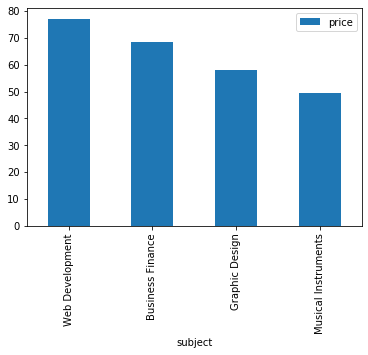

In [52]:
show.plot.bar()

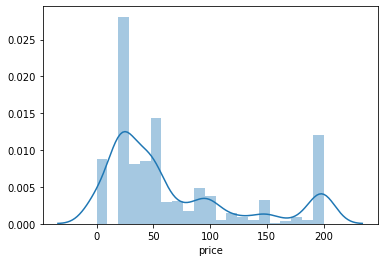

In [53]:
import seaborn as sns

sns.distplot(df['price'])


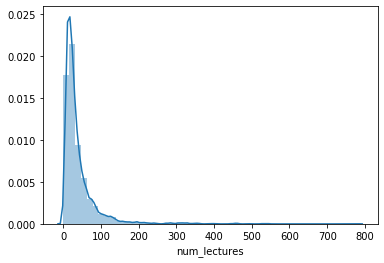

In [54]:

sns.distplot(df['num_lectures'])


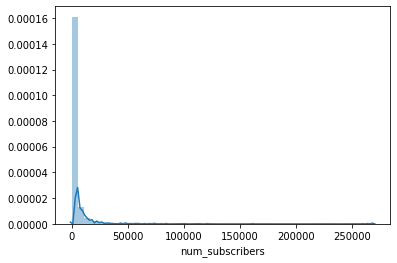

In [55]:

sns.distplot(df['num_subscribers'])


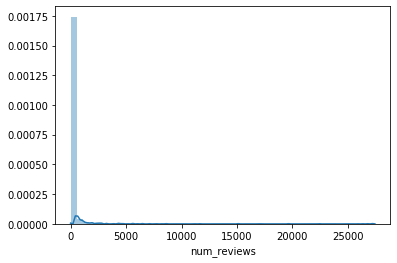

In [56]:
sns.distplot(df['num_reviews'])


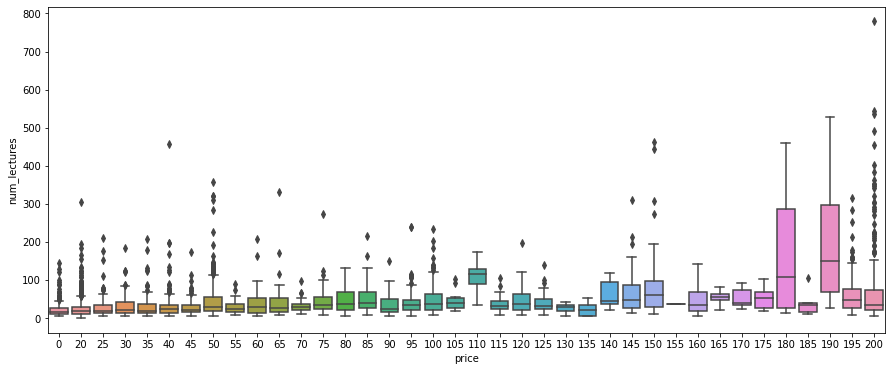

In [57]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='price', y='num_lectures', data=df)

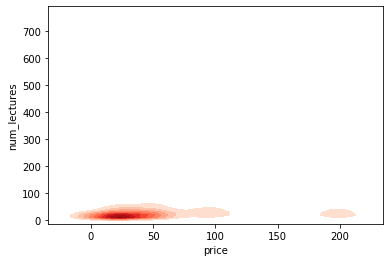

In [58]:
sns.kdeplot(df['price'],df['num_lectures'],shade=True,cmap="Reds", shade_lowest=False)

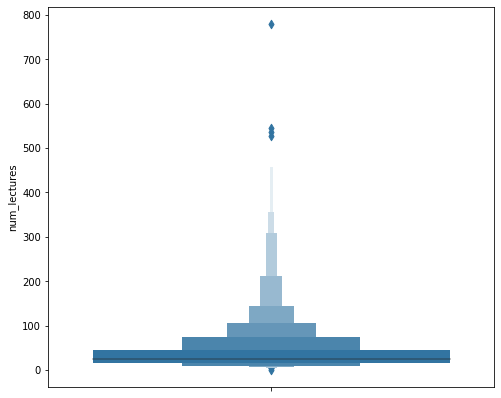

In [59]:
plt.figure(figsize=(8,7))
sns.boxenplot(y=df["num_lectures"])
plt.show()

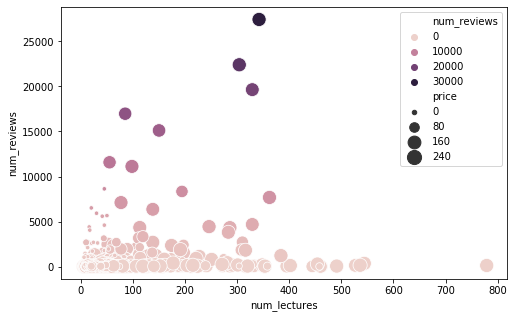

In [60]:


plt.figure(figsize=(8,5))
sns.scatterplot(x='num_lectures',y='num_reviews',hue='num_reviews',size='price',sizes=(20,200),data=df)
plt.show()



# we will look the data and apply the steps CRISP - DM

- Step 1 - 2 : Business understand & Data understand

in this step we need to get answers for some questions from data like examples

1- what is the level students take the course Introduction to Web Development ?

2- how many lectures for all courses ?

3- what is courses published in year 2017  ?

4- show all sttudent level used by barchart .

# the first question : what is level students take the course Introduction to Web Development ?

In [61]:
def level_students():
    
    """
    for answer this question we need to explore the columns  
    [course_title] and [level].
    
    """
    
    #count all types in the varibles course_title
    print(" The All Count course_title  \n \n" + str(df['course_title'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All Count level  \n \n " + str(df['level'].value_counts())  + "\n\n")
    
    #selected the data we need to get only based on the question .
    interrmediate_Courses = df.loc[(df['course_title'] == 'Introduction to Web Development') & (df['level'])]
    
    #Display The Answer
    print(" The level for students take course Introduction to Web Development" + str(len(interrmediate_Courses)))
    
    #Display the data frame .
    return interrmediate_Courses.head(3)
    
    
level_students() 

 The All Count course_title  
 
Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours          2
CFA Level 2- Quantitative Methods                               2
Drum Lessons For Beginners                                      2
                                                               ..
Getting Started with WordPress 2016                             1
Forex/Opciones Binarias para Principiantes                      1
Learn Spring Framework Practically - Hands On Recipies          1
Complete React JS web developer with ES6 - Build 10 projects    1
Forex Trading -  Learn to Trade From Scratch!                   1
Name: course_title, Length: 3663, dtype: int64


 The All Count level  
 
 All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


 The level for students take co

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2607,178640,Introduction to Web Development,https://www.udemy.com/introduction-to-web-deve...,True,50,5921,35,42,Beginner Level,4.5,2014-03-11T19:43:30Z,Web Development
2660,99986,Introduction to Web Development,https://www.udemy.com/introduction-to-web-deve...,True,20,18143,159,15,Beginner Level,2.0,2013-10-04T13:40:59Z,Web Development


# the second question :  how many lectures for all courses ?

In [62]:
def courses_big_lectures():
    
    """
    for answer this question we need to explore the columns  
    [course_title] and [num_lectures].
    
    """
    
    #count all types in the varibles course_title
    print(" The All Count course_title  \n \n" + str(df['course_title'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All num_lectures  \n \n " + str(df['num_lectures'].value_counts())  + "\n\n")
    
    
    
    #print  how many lectures in all courses  .
    
    courses_ttitle = df['course_title']
    
    num_lectures = df['num_lectures']
    
    for l, n in zip(courses_ttitle, num_lectures):
        
        print(f' Course Title : {l}')
        
        
        print(f' Number lectures: {n}')
        
        
    return  Courses_lectures
    
    
#Calledd Function    
courses_big_lectures() 

 The All Count course_title  
 
Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours          2
CFA Level 2- Quantitative Methods                               2
Drum Lessons For Beginners                                      2
                                                               ..
Getting Started with WordPress 2016                             1
Forex/Opciones Binarias para Principiantes                      1
Learn Spring Framework Practically - Hands On Recipies          1
Complete React JS web developer with ES6 - Build 10 projects    1
Forex Trading -  Learn to Trade From Scratch!                   1
Name: course_title, Length: 3663, dtype: int64


 The All num_lectures  
 
 12     121
15     109
13     107
14     105
11     104
      ... 
444      1
527      1
458      1
460      1
0        1
Name: num_lectures, Length: 229, dtype: int64

 Number lectures: 24
 Course Title : Professional Bookkeeping & Accounting 4:Trial Balance & More
 Number lectures: 21
 Course Title : Internal Controls - Design, Implementation and Monitoring
 Number lectures: 27
 Course Title : Forex online live trading system (Special Offer)
 Number lectures: 34
 Course Title : Winning Options Trading System
 Number lectures: 24
 Course Title : Learn The ABC's Of Investing And Understanding True Financial Value
 Number lectures: 8
 Course Title : How to invest in Russian equity market
 Number lectures: 12
 Course Title : Handle difficult questions the bank manager will ask you
 Number lectures: 12
 Course Title : Credit Control Procedures
 Number lectures: 6
 Course Title : FMT: Forex Market Trader Certificate
 Number lectures: 27
 Course Title : Six Stage Negotiation
 Number lectures: 21
 Course Title : Financial Reporting - Fundamentals/Basics
 Number lectures: 28
 Course Title : Decide whether to Invest in a Business 
 Number lectures: 43
 Course

 Number lectures: 39
 Course Title : Trading: From Wall Street to Your Street
 Number lectures: 37
 Course Title : Build your own Naked Trading Forex Robot
 Number lectures: 19
 Course Title : Tax Preparation: Learn Fast! Prepare Taxes with Confidence!
 Number lectures: 33
 Course Title : Tax Strategies of the Wealthy
 Number lectures: 11
 Course Title : The Ultimate Fibonacci Trading Plan for Forex and Stocks
 Number lectures: 15
 Course Title : Finance and Accounting for Startups
 Number lectures: 75
 Course Title : Forex - Calculate Lot Size Like Pro
 Number lectures: 11
 Course Title : The Complete Forex Trader
 Number lectures: 46
 Course Title : Tape Reading: Learn how to read the tape for day trading
 Number lectures: 32
 Course Title : 4 Easy Daily Forex Trades: A Recipe for Trading Success
 Number lectures: 12
 Course Title : Trading Robot Forex Programs in Your Sleep in Live Examples!
 Number lectures: 18
 Course Title : Free Options 101 - Basic of Call and Put Options in 1 H

 Number lectures: 15
 Course Title : The Complete Figure Drawing Course HD
 Number lectures: 225
 Course Title : Mastering Logo Design - 20 Projects step-by-step
 Number lectures: 77
 Course Title : Graphic Design: Create Animated GIF Ad Banners in Photoshop
 Number lectures: 20
 Course Title : Learn Inkscape : Design Logos and Game Arts
 Number lectures: 12
 Course Title : Typography: Learn the Basics to Build a Solid Foundation
 Number lectures: 34
 Course Title : Master Manga Studio 5: Bonus Drawing and Painting
 Number lectures: 61
 Course Title : Learn Adobe Photoshop from scratch to professional
 Number lectures: 19
 Course Title : 7 Secrets To Designing In Black and White
 Number lectures: 12
 Course Title : Photoshop CS 6 ile Fotoğraf İşlemenin Temelleri
 Number lectures: 78
 Course Title : 誰でもわかる Adobe Illustrator CS6
 Number lectures: 15
 Course Title : Devenez le king de l'illustration automobile
 Number lectures: 32
 Course Title : Corel Draw X7 Eğitimi (Temelden İleri Sevi

 Course Title : Alto Saxophone Lessons For Beginners
 Number lectures: 42
 Course Title : Instant Harmonica - Christmas; play Jingle Bells part 2 now!
 Number lectures: 10
 Course Title : Piano With Willie: Jazz & Gospel Exercises
 Number lectures: 28
 Course Title : Bending the blue notes to give you killer sound on harmonica
 Number lectures: 14
 Course Title : Beginner's Guitar: Tuning, Strumming, and Chords!
 Number lectures: 6
 Course Title : Instant Harmonica - play The Lion Sleeps Tonight - today!
 Number lectures: 11
 Course Title : Piano With Willie Building Technique with Scales Vol. 3
 Number lectures: 11
 Course Title : Instant Bodhran - part two; learning further drumming skills
 Number lectures: 10
 Course Title : Guitar Essentials
 Number lectures: 18
 Course Title : Rhythm to Rock Drum Lessons
 Number lectures: 7
 Course Title : Learn to play and improve 12 bar blues harmonica solos
 Number lectures: 27
 Course Title : Learn to improvise on your harmonica - in nice easy

 Course Title : Learn to Setup Websites from Scratch
 Number lectures: 24
 Course Title : Create Fast RESTful APIs with Lumen and Homestead by Laravel
 Number lectures: 31
 Course Title : Build Modern Websites Quick With HTML,CSS and Bootstrap
 Number lectures: 48
 Course Title : Twitter Integration customize Tweets with developer API
 Number lectures: 19
 Course Title : Build a Responsive Website with a Modern Flat Design
 Number lectures: 17
 Course Title : The Ultimate WordPress Boot Camp: Build 7 Websites
 Number lectures: 140
 Course Title : Master the Basics of HTML5 & CSS3: Beginner Web Development
 Number lectures: 38
 Course Title : Become A Full Stack Web Developer in 14 Days
 Number lectures: 126
 Course Title : Projects In ReactJS - The Complete React Learning Course
 Number lectures: 56
 Course Title : Beginning Web development Learn the basics of HTML
 Number lectures: 59
 Course Title : Step by Step Build Your Template by Bootstrap 4 from scratch
 Number lectures: 24
 Co

 Number lectures: 19
 Course Title : Learn Top Ten PHP FrameWorks By Building Projects
 Number lectures: 87
 Course Title : How to Make a Video Blog Website From Scratch w/ Wordpress 
 Number lectures: 22
 Course Title : Build Websites And Apps By Outsourcing
 Number lectures: 22
 Course Title : Learning Path: Web Applications with Spring and Angular
 Number lectures: 33
 Course Title : Learn Ruby on Rails By Building Projects
 Number lectures: 47
 Course Title : Canvas image Creator HTML5 JavaScript project from Scratch
 Number lectures: 35
 Course Title : Javascript Essentials
 Number lectures: 41
 Course Title : Devtools 2017: The Basics of Chrome Developer Tools
 Number lectures: 18
 Course Title : Chrome Extensions : Develop 5 chrome extensions from scratch
 Number lectures: 44
 Course Title : Learn how to quickly build websites using Wordpress
 Number lectures: 28
 Course Title : Advance Unix : File Processing: AWK | SED | GREP | CUT | VIM
 Number lectures: 84
 Course Title : Dev

NameError: name 'Courses_lectures' is not defined

# The question 3 : what is date for published courses ?

In [63]:
def courses_and_data():  
    
    """
    in this answer need to print what is dates for published courses .
    we will select the columns ['course_title'] andd ['published_timestamp']
    
    """
    
    Courses_name = df['course_title']
    
    Courses_lecture = df['published_timestamp']
    
    #used the functio zip in python.
    for l, n in zip(Courses_name, Courses_lecture):
        
        print(f' Course Title : {l} \n')
        
        print(f'    Published Date: {n} \n')
     


courses_and_data()        
    


 Course Title : Ultimate Investment Banking Course 

    Published Date: 2017-01-18T20:58:58Z 

 Course Title : Complete GST Course & Certification - Grow Your CA Practice 

    Published Date: 2017-03-09T16:34:20Z 

 Course Title : Financial Modeling for Business Analysts and Consultants 

    Published Date: 2016-12-19T19:26:30Z 

 Course Title : Beginner to Pro - Financial Analysis in Excel 2017 

    Published Date: 2017-05-30T20:07:24Z 

 Course Title : How To Maximize Your Profits Trading Options 

    Published Date: 2016-12-13T14:57:18Z 

 Course Title : Trading Penny Stocks: A Guide for All Levels In 2017 

    Published Date: 2014-05-02T15:13:30Z 

 Course Title : Investing And Trading For Beginners: Mastering Price Charts 

    Published Date: 2016-02-21T18:23:12Z 

 Course Title : Trading Stock Chart Patterns For Immediate, Explosive Gains 

    Published Date: 2015-01-30T22:13:03Z 

 Course Title : Options Trading 3 : Advanced Stock Profit and Success Method 

    Publishe


    Published Date: 2014-05-07T12:48:04Z 

 Course Title : Investment Portfolio Analysis with Excel 

    Published Date: 2015-11-12T21:51:19Z 

 Course Title : Introduction to the CFA Program 

    Published Date: 2013-08-12T11:10:42Z 

 Course Title : Chartered Financial Analyst (CFA) - Level 1 - FRA 

    Published Date: 2014-06-30T09:21:49Z 

 Course Title : Excel 4 Accounting & Bookkeeping - Master Lookup Functions 

    Published Date: 2016-02-13T03:19:09Z 

 Course Title : Cashflow Management for Small Businesses: A How To Guide 

    Published Date: 2016-06-13T14:39:21Z 

 Course Title : Forex Basics (Professional Course Level) 

    Published Date: 2014-12-19T08:49:47Z 

 Course Title : Advanced Butterfly Spreads for Options Income Strategies 

    Published Date: 2017-07-04T18:08:01Z 

 Course Title : The Holy Grail of Auto Trading Forex Futures Stocks Revealed 

    Published Date: 2016-05-03T18:23:01Z 

 Course Title : IPO Fundamentals 

    Published Date: 2017-03-02T00:5


    Published Date: 2016-10-18T18:51:48Z 

 Course Title : Start-up financial modeling for non-finance professionals 

    Published Date: 2016-06-20T21:49:39Z 

 Course Title : The Fast Route to a Faster Financial Close 

    Published Date: 2017-06-23T22:05:17Z 

 Course Title : Easy Finance For Startups 

    Published Date: 2016-10-16T21:15:15Z 

 Course Title : Excel 4 Accounting & Bookkeeping - Master Date,Time & Text 

    Published Date: 2016-06-27T21:19:23Z 

 Course Title : Depreciation, Amortization and Depletion 

    Published Date: 2017-03-06T23:59:02Z 

 Course Title : Breakeven Analysis and Pricing 

    Published Date: 2014-09-22T04:32:37Z 

 Course Title : Tally ERP Complete Training in Urdu / Hindi 

    Published Date: 2017-02-02T17:03:27Z 

 Course Title : Accounting Simplified 

    Published Date: 2017-05-03T16:14:01Z 

 Course Title : Series 7: Intermediate Options 

    Published Date: 2017-04-17T22:33:36Z 

 Course Title : Accounting and Business Basics 

   


    Published Date: 2015-07-07T00:14:56Z 

 Course Title : Create Beautiful Image Maps for Your Website 

    Published Date: 2016-01-18T17:56:36Z 

 Course Title : T-Shirt Design Workshop 02: Mixed Media Design 

    Published Date: 2016-06-27T00:03:29Z 

 Course Title : Design a unique bookstore-quality Photo Book with Blurb 

    Published Date: 2016-04-26T18:30:41Z 

 Course Title : Learn to Create Deliverable Brand Identity Package 

    Published Date: 2017-04-13T00:51:27Z 

 Course Title : How to Draw Pinups and Sexy Women 

    Published Date: 2013-11-19T03:05:51Z 

 Course Title : Design & Create Text Logos in Adobe Photoshop CS5 

    Published Date: 2016-10-16T17:25:29Z 

 Course Title : Freelancing A-Z: How To Start A Successful Freelance Career 

    Published Date: 2016-05-24T17:13:50Z 

 Course Title : Character Concept Design for Beginners 

    Published Date: 2016-09-18T17:56:23Z 

 Course Title : Icon & Logo Symbol Design in Adobe Illustrator 

    Published Date: 2


    Published Date: 2015-11-02T21:50:52Z 

 Course Title : Play Piano Today - Easy Festive Favorites & Piano Party Hits 

    Published Date: 2013-10-27T15:18:29Z 

 Course Title : The 80/20 Beginner Guitar Course 

    Published Date: 2016-04-28T18:21:33Z 

 Course Title : Drums for Beginners 

    Published Date: 2017-06-19T20:58:55Z 

 Course Title : Digital Pianist Course-Learn Piano & Keyboard Fast & Easy 

    Published Date: 2016-12-26T15:21:25Z 

 Course Title : Learn to play guitar and sing at the same time 

    Published Date: 2016-11-25T22:42:01Z 

 Course Title : Introduction to Ukulele 1 

    Published Date: 2015-12-01T19:23:03Z 

 Course Title : Learn Flute FAST! 

    Published Date: 2015-06-02T19:50:16Z 

 Course Title : Guitar Lessons - Soloing With Arpeggios - Essential Guide  

    Published Date: 2016-02-13T20:32:55Z 

 Course Title : Piano With Willie: Blues n' Boogie Vol. 3 

    Published Date: 2016-04-13T05:42:43Z 

 Course Title : Instant Harmonica - play Th


    Published Date: 2015-01-31T02:24:19Z 

 Course Title : 8 Beautiful Ruby on Rails Apps in 30 Days & TDD - Immersive  

    Published Date: 2016-03-08T07:36:40Z 

 Course Title : Wordpress Website Mastery 2017 

    Published Date: 2017-01-18T17:01:40Z 

 Course Title : How To Make an eCommerce Website With Wordpress 2017 

    Published Date: 2017-05-09T22:08:11Z 

 Course Title : Mastering ASP.NET MVC 5 From Scratch Using C# 

    Published Date: 2016-12-01T20:30:59Z 

 Course Title : Start Web Development with GIS Map in JavaScript 

    Published Date: 2016-02-28T23:43:19Z 

 Course Title : Learn to Build Websites using Twitter Bootstrap 

    Published Date: 2014-04-14T07:51:24Z 

 Course Title : Web Development Tools the Pros Use: Code Productivity Hacks 

    Published Date: 2015-10-08T18:13:22Z 

 Course Title : WordPress : An Overview 

    Published Date: 2015-02-02T04:48:51Z 

 Course Title : Create Startup Landing Page with Viral Marketing Strategies 

    Published Date

    Published Date: 2016-08-23T18:49:41Z 

 Course Title : Introduction to QGIS Python Programming 

    Published Date: 2016-12-22T00:11:22Z 

 Course Title : Learning Object-Oriented JavaScript 

    Published Date: 2015-02-17T09:53:12Z 

 Course Title : Bootstrap Tutorial for Beginners 

    Published Date: 2016-02-21T16:50:57Z 

 Course Title : Learn Bootstrap3 With Multi Purposes Single Page Layout 

    Published Date: 2016-02-16T21:59:01Z 

 Course Title : HTML for Beginners 

    Published Date: 2013-07-20T00:52:41Z 

 Course Title : How to Build WordPress Themes: A Web Designer's Guide 

    Published Date: 2017-03-31T23:56:08Z 

 Course Title : XML DTD :basics for beginners 

    Published Date: 2016-09-26T16:52:50Z 

 Course Title : Learn to make an HTML 5 website with a video background 

    Published Date: 2015-06-05T18:13:08Z 

 Course Title : Learn Authentication With ASP.NET Identity Security 2017 

    Published Date: 2016-02-26T17:41:37Z 

 Course Title : HTML and CS

# Question 4 : Provide a pandas series of the all student level values in the dataset , used barchart .

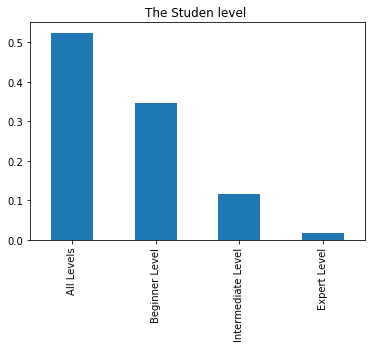

In [64]:
def sttudent_Levels():
    
    """
    in this question need to provide the student levels 
    used by bar chart .
    """
    
    
    #count the programhobby varible and make bar chart 
    status_vals = df['level'].value_counts()
    
    #devision thee counts at the shape then make bar chart
    (status_vals/df.shape[0]).plot(kind="bar");
    
    #assign the title 
    plt.title("The Studen level ");


#called function
sttudent_Levels()
    


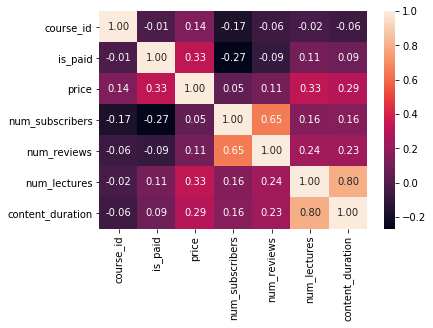

In [65]:
# representing the data in heatmap 
sns.heatmap(df.corr(), annot=True, fmt='.2f');


# The free courses by subject .

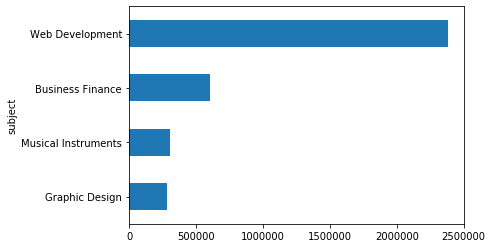

In [66]:
df[df['is_paid']==0].groupby('subject')['num_subscribers'].sum().sort_values(ascending=True).plot(kind='barh')

# Best paid courses by subject.

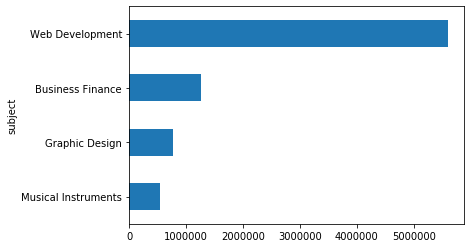

In [67]:
df[df['is_paid']==1].groupby('subject')['num_subscribers'].sum().sort_values(ascending=True).plot(kind='barh')

# Most popular free courses 

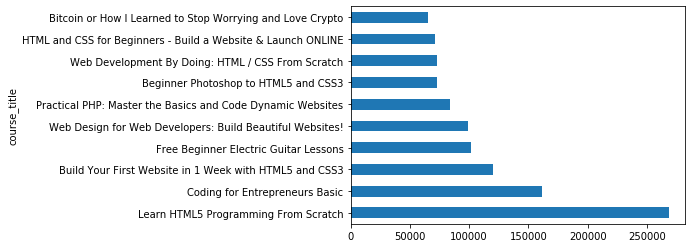

In [68]:
df[df['is_paid']==0].groupby('course_title')['num_subscribers'].sum().sort_values(ascending=True).nlargest(10).plot(kind='barh')

# Most popular paid courses

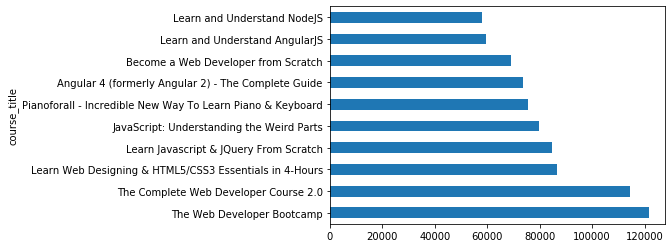

In [69]:
df[df['is_paid']==1].groupby('course_title')['num_subscribers'].sum().sort_values(ascending=True).nlargest(10).plot(kind='barh')

# step 3  : Prepare Data  

 in this step we will working around data and make cleaning data 
  and need to know some info same 
  
 - **what is percent missing values in the varibles**
 - **what is varibles have more missing values** 
 - **what is frequent values in the varibles**
 - **what is the best decesion for missing values**
 - **Assign the predicts varibles and Response varibles**


In [70]:
def Perecnt_Missing():
    
    '''
    we need to get the percent missing values 
    in all columns for see what is varibles 
    have more missing values.
    
    Missing Values :
    
    the first step in preparing data the "Missing Values" 
    In statistics, missing data, or missing values,
    occur when no data value is stored for the variable
    in an observation Missing data are a common occurrence and 
    can have a significant effect on the conclusions
    that can be drawn from the data.
    '''
    
    #select the missing values and get sum then 
    #multiplication * 100 then division at the len dataframe 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'percent_missing': percent_missing})
    
    #Display from 0 to 20 columns
    return missing_value_df[0:20]


#called function
Perecnt_Missing()

,Column_name,percent_missing
course_id,course_id,0.0
course_title,course_title,0.0
url,url,0.0
is_paid,is_paid,0.0
price,price,0.0
num_subscribers,num_subscribers,0.0
num_reviews,num_reviews,0.0
num_lectures,num_lectures,0.0
level,level,0.0
content_duration,content_duration,0.0


# Prepare data for modeling ..

- Chose the predicts varibles inside list and check the missing values in this varibles
- Assign the predict varible
- Assign the responnse varible

### Type of problem.

In this model, we provide a solution to a problem of (LinearRegression) in machine Learning science and all under the category of directed learning, these problems are concerned with predicting prices in the majority of problems that need solutions of this type.

Super vised learning problems have several algorithms One of the most famous (LinearRegression) Which we will apply in building this model

After building the model and training it on the training data and dividing the data into training and testing data, we tested the model on a set of data to predict the prices of the courses according to the response variable data.

# Model Accurecy. 

In linear regression problems, we have some well-known algorithms in evaluating the performance of the model, which we will apply to our model

Among the most famous evaluation algorithms used with regression problems are

- 1- mean_squared_error
- 2- mean_absolute_error
- 3- r2_score

In [73]:
#Model Accurecy.
'''''''''''
def evaluated():
    
    '''
#    this is final step in analysis 
#    we will evaluated Results model
#    used by Accuricy algorithms
    '''
    
    #Accuracy Model used Algorithm (Mean Squared Error)
    print("The mean squared score for the model {} ".format(mean_squared_error(Y_test, predict)))
    
    #Accuracy Model used Algorithm (mean_absolute_error)
    print("The mean_absolute_error for the model {}".format(mean_absolute_error(Y_test, predict)))
    
    #Accuracy Model used Algorithm (R2)
    print("The R2 score for the model {} ".format(r2_score(Y_test, predict)))
    
evaluated()

The mean squared score for the model 3359.5512338153694 
The mean_absolute_error for the model 45.220584215600624
The R2 score for the model 0.1131789178839736 


In [75]:
from sklearn.preprocessing import LabelEncoder
enc  = LabelEncoder()
enc.fit(df['course_title'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['course_title']) )

df['course_title'] = enc.transform(df['course_title'])
#print('Updates dataframe is : \n' ,df )


equivilant numbers are :  [3406  779 1206 ... 2251  683 3429]


In [76]:
from sklearn.preprocessing import LabelEncoder
enc  = LabelEncoder()
enc.fit(df['url'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['url']) )

df['url'] = enc.transform(df['url'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [3478 1451 1231 ... 2120  945 3500]


In [77]:
enc  = LabelEncoder()
enc.fit(df['subject'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['subject']) )

df['subject'] = enc.transform(df['subject'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [0 0 0 ... 3 3 3]


In [78]:
enc  = LabelEncoder()
enc.fit(df['level'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['level']) )

df['level'] = enc.transform(df['level'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [0 0 3 ... 0 0 1]


In [79]:
enc  = LabelEncoder()
enc.fit(df['published_timestamp'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['published_timestamp']) )

df['published_timestamp'] = enc.transform(df['published_timestamp'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [3002 3191 2915 ... 1751 2503  583]


In [80]:
enc  = LabelEncoder()
enc.fit(df['course_id'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['course_id']) )

df['course_id'] = enc.transform(df['course_id'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [3115 3237 2915 ... 1645 2564  619]


In [81]:
enc  = LabelEncoder()
enc.fit(df['is_paid'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['is_paid']) )

df['is_paid'] = enc.transform(df['is_paid'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [1 1 1 ... 1 1 1]


In [82]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,3115,3406,3478,1,200,2147,23,51,0,1.5,3002,0
1,3237,779,1451,1,75,2792,923,274,0,39.0,3191,0
2,2915,1206,1231,1,45,2174,74,51,3,2.5,2915,0
3,3507,444,790,1,95,2451,11,36,0,3.0,3518,0
4,2934,1580,1648,1,200,1276,45,26,3,2.0,2890,0


In [142]:
df=df.drop(['course_id','course_title','url','is_paid'],axis=1)
df.head()

,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,200,2147,23,51,0,1.5,3002,0
1,75,2792,923,274,0,39.0,3191,0
2,45,2174,74,51,3,2.5,2915,0
3,95,2451,11,36,0,3.0,3518,0
4,200,1276,45,26,3,2.0,2890,0


In [143]:
#in this cell we choose the features,which are all columns except the price
X=df.drop(['price'],axis=1)
X.head()

,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,2147,23,51,0,1.5,3002,0
1,2792,923,274,0,39.0,3191,0
2,2174,74,51,3,2.5,2915,0
3,2451,11,36,0,3.0,3518,0
4,1276,45,26,3,2.0,2890,0


In [144]:
#in this cell we choose the class,which we want to preidict,the target is the price
y=df['price']
y.head()

0    200
1     75
2     45
3     95
4    200
Name: price, dtype: int64

In [157]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2 , f_classif 

FeatureSelection = GenericUnivariateSelect(score_func= f_classif, mode= 'k_best', param=3)  # score_func can = f_classif 
X = FeatureSelection.fit_transform(X, y)


In [158]:
#here we divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=536) 

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-3)
LinearRegressionModel.fit(X_train, y_train)
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10].round(0))
print('Real Value for Linear Regression is      : ' , list(y_test[:10]))
LinearRegressionModel.score(X_test, y_test)

Predicted Value for Linear Regression is :  [51. 58. 65. 79. 77. 64. 70. 52. 59. 63.]
Real Value for Linear Regression is      :  [20, 50, 75, 200, 40, 20, 195, 200, 195, 95]


0.027537625335602223

In [160]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)


Mean Absolute Error Value is :  46.32202323675102
Mean Squared Error Value is :  3351.5802859504697


In [161]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf',  degree=3,  gamma='auto',  coef0=0.1,  tol=0.1,  C=1.0,  epsilon=0.1, cache_size=200)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

y_pred = clf.predict(X_test) 
print('Predicted Value for Linear Regression is : ' , y_pred[:10].round(0))
print('Real Value for Linear Regression is      : ' , list(y_test[:10]))
LinearRegressionModel.score(X_test, y_test)



Predicted Value for Linear Regression is :  [45. 45. 45. 45. 45. 45. 45. 45. 45. 45.]
Real Value for Linear Regression is      :  [20, 50, 75, 200, 40, 20, 195, 200, 195, 95]


0.027537625335602223

In [162]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  42.61877145713433
Mean Squared Error Value is :  3817.5537055635755


In [163]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10].round((0)))
print('ٌReal for DecisionTreeRegressorModel is            : ' , list(y_test[:10]))

Predicted Value for DecisionTreeRegressorModel is :  [35. 35. 79. 79. 79. 46. 79. 45. 79. 79.]
ٌReal for DecisionTreeRegressorModel is            :  [20, 50, 75, 200, 40, 20, 195, 200, 195, 95]


In [164]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  44.48895742366584
Mean Squared Error Value is :  3222.320677373578


In [165]:
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)
print('Predicted Value for naive bayes model is : ' , y_pred[:10].round((0)))
print('ٌReal Value for naive bayes model is      : ' , list(y_test[:10]))

Predicted Value for naive bayes model is :  [35. 35. 79. 79. 79. 46. 79. 45. 79. 79.]
ٌReal Value for naive bayes model is      :  [20, 50, 75, 200, 40, 20, 195, 200, 195, 95]


In [166]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  44.48895742366584
Mean Squared Error Value is :  3222.320677373578
